In [ ]:
# !pip install dgl-cu110
!pip install dgl
!pip install pygame
!pip install portalocker

     |████████████████████████████████| 4.4MB 17.1MB/s 
     |████████████████████████████████| 11.8MB 16.6MB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
import sys
base_path = "/content/gdrive/My Drive/EtaZero/src"
sys.path.append(base_path)

Mounted at /content/gdrive


In [ ]:
%matplotlib inline
from agent_evaluation.arena import Arena
from agents.eta_zero import EtaZero
from agents.random_agent import RandomAgent
from agents.network_agent import RawNetwork
from agents.uct_agent import UCTAgent
from networks.graph_networks import PolicyValRGCN
import datetime
import os
import torch
import utils
section = "Attempt7"

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


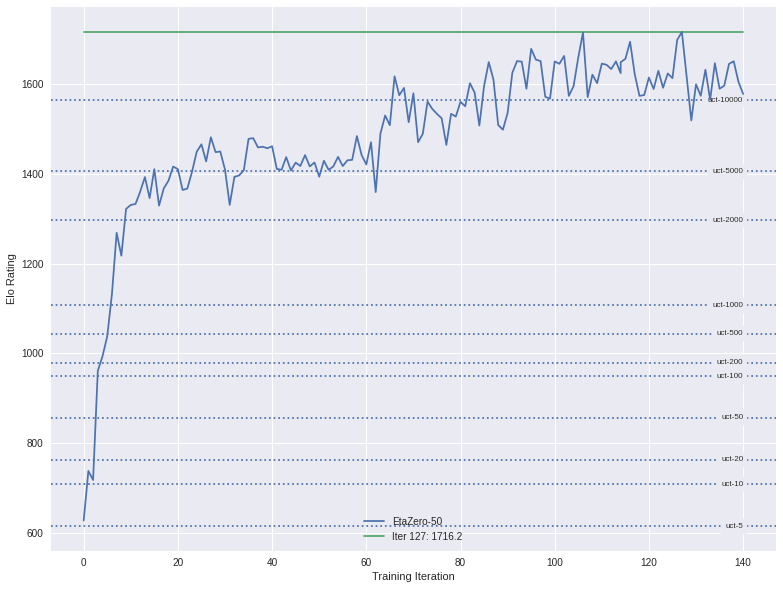

In [ ]:
arena = Arena(base_path, section, saving_enabled=False)
arena.plot_all()

In [ ]:
arena = Arena(base_path, section=section)
arena.add_task(
    EtaZero.Series(50, base_path, section, lower_limit=70),
    EtaZero.Series(50, base_path, section, lower_limit=70),
    game_pairs=20,
    shift=[1,10]
)
smps = list((5, 10, 20) + UCTAgent.Series.all_samples)
arena.add_task(
    UCTAgent.Series(smps),
    UCTAgent.Series(smps),
    game_pairs=20,
    shift=[1,2,5]
)
smps.remove(1000)
arena.add_task(
    EtaZero.Series(50, base_path, section, lower_limit=114),
    UCTAgent.Series(smps),
    game_pairs=40
)
arena.start()

20 games EtaZero-50-PolicyValRGCN-128-2021-04-06-23-41-46 vs uct-2000 (fixed):
 0% + + won 2 of 2
10% + + won 4 of 4
20% + + won 6 of 6
30% - + won 7 of 8
40% - + won 8 of 10
50% + + won 10 of 12
60% + + won 12 of 14
70% + + won 14 of 16
80% + + won 16 of 18
90% + + won 18 of 20
100%
Won 18 of 20
New elo: 1623.9 (history = {'EtaZero-50-PolicyValRGCN-127-2021-04-05-23-32-52': [22, 40], 'EtaZero-50-PolicyValRGCN-118-2021-03-28-18-36-55': [17, 40], 'uct-1000': [37, 40], 'uct-10000': [32, 52], 'uct-2000': [18, 20]})
8 games EtaZero-50-PolicyValRGCN-128-2021-04-06-23-41-46 vs uct-2000 (fixed):
 0% - + won 1 of 2
20% - + won 2 of 4
50% + - won 3 of 6
70% + + won 5 of 8
100%
Won 5 of 8
New elo: 1609.8 (history = {'EtaZero-50-PolicyValRGCN-127-2021-04-05-23-32-52': [22, 40], 'EtaZero-50-PolicyValRGCN-118-2021-03-28-18-36-55': [17, 40], 'uct-1000': [37, 40], 'uct-10000': [32, 52], 'uct-2000': [23, 28]})
20 games EtaZero-50-PolicyValRGCN-129-2021-04-07-14-26-48 vs uct-500 (fixed):
 0% + + won 2 

KeyboardInterrupt: ignored

In [ ]:
arena = Arena(base_path, section=section)
arena.add_task(
    EtaZero.Series(50, base_path, section),
    RandomAgent.Series(),
    game_pairs=20
)
arena.start()